# Random Forest Classification Implementation

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [126]:
# read data from csv & create a dataframe
# dataset has 20 rows & 4888 columns

travel_df = pd.read_csv("../datasets/Travel.csv")
travel_df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Feature Engineering 

## Handling Missing Values

1. Handling Missing Values - df.isnull().sum()
    Example - 
        ProdTaken                     0 - if 0 no missing values in this column
        Age                         226 - here 226 missing values are there in this column

2. Check the dataset all categories properly with their naming conventions and values 
    df['column_name'].value.counts()

2. Handling duplicates
3. Check data type
4. Understand the dataset

In [127]:
travel_df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [128]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [129]:
for feature in travel_df.columns:
    print("-----------------------------------------------------")
    print(feature.upper(),"\n")
    print(travel_df[feature].unique(), "\n")
    if feature in ['Passport', 'PreferredPropertyStar'] or travel_df[feature].dtype=='O':
        print(travel_df[feature].value_counts())

-----------------------------------------------------
CUSTOMERID 

[200000 200001 200002 ... 204885 204886 204887] 

-----------------------------------------------------
PRODTAKEN 

[1 0] 

-----------------------------------------------------
AGE 

[41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.] 

-----------------------------------------------------
TYPEOFCONTACT 

['Self Enquiry' 'Company Invited' nan] 

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
-----------------------------------------------------
CITYTIER 

[3 1 2] 

-----------------------------------------------------
DURATIONOFPITCH 

[  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.] 

------------------------------------

In [130]:
travel_df['Gender'].value_counts()

# both Female and fe male are same & should be combined together 

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [131]:
travel_df['MaritalStatus'].value_counts()

# similarlily here Single & Unmarried can be combined as one

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [132]:
travel_df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [133]:
travel_df['Gender'] = travel_df['Gender'].replace('Fe Male', 'Female')
travel_df['MaritalStatus'] = travel_df['MaritalStatus'].replace('Single','Unmarried' )

travel_df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [134]:
print("--------------------------", "\n")
print(travel_df['Gender'].value_counts())
print("--------------------------", "\n")
print(travel_df['MaritalStatus'].value_counts())
print("--------------------------", "\n")

# find all the unique values of the columns
print(travel_df.Gender.unique())
print(travel_df.MaritalStatus.unique())


-------------------------- 

Gender
Male      2916
Female    1972
Name: count, dtype: int64
-------------------------- 

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64
-------------------------- 

['Female' 'Male']
['Unmarried' 'Divorced' 'Married']


## Print all the features and their missing values count

In [135]:
for feature in travel_df.columns:
    print("------------------------Feature-wise missing value count-------------------------------------------")
    print(feature.upper(),"\n")
    print(travel_df[feature].isnull().sum(),"\n")
    

------------------------Feature-wise missing value count-------------------------------------------
CUSTOMERID 

0 

------------------------Feature-wise missing value count-------------------------------------------
PRODTAKEN 

0 

------------------------Feature-wise missing value count-------------------------------------------
AGE 

226 

------------------------Feature-wise missing value count-------------------------------------------
TYPEOFCONTACT 

25 

------------------------Feature-wise missing value count-------------------------------------------
CITYTIER 

0 

------------------------Feature-wise missing value count-------------------------------------------
DURATIONOFPITCH 

251 

------------------------Feature-wise missing value count-------------------------------------------
OCCUPATION 

0 

------------------------Feature-wise missing value count-------------------------------------------
GENDER 

0 

------------------------Feature-wise missing value count---------

## Find out all the features with NaN values

- atleast one NaN value is present in the column - condition -----> if travel_df[feature].isnull().sum() > =1 for each feature(col) in dataframe

In [136]:
# list features with at least one missing value
feature_with_nan_val = [feature for feature in travel_df.columns if travel_df[feature].isnull().sum() >= 1]
for feature in feature_with_nan_val:
    #  find out the missing value & then do the mean and multiply by 100%
    # use isnull() (call the method) and then mean() to get the fraction of missing values
    print(feature, np.round(travel_df[feature].isnull().mean() * 100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


## Checking the describe - to check if my data has outliers or not

Describe - what is the 0percentile, 25 percentile, 50 percentile, 75percentile, max, min, standard devivation etc... for each column feature

In [137]:
#  basic describe info
travel_df[feature_with_nan_val].select_dtypes(exclude='object').describe()

# if we see the mean value & 50% value for any columns - eg(age col) - 37.622265(mean), 36.000000(50%) these are very close values
# inference - less number of outliers for age col, & hence for rest columns & dataset

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null Values

### if any integer/float values in data -- we use median
### if any categorical feature in data  -- we use mode

1. Impute median value for age column
2. Impute mode for Type of Contract
3. Impute median for Duration of Pitch
4. Impute mode for NumberofFollowup as it is Discrete Feature
5. Impute mode for PreferredPropertyStar
6. Impute median for NumberOfTrips
7. Impute mode for NumberOfChildrenVisting
8. Impute median for MonthlyIncome

In [138]:
#Age
travel_df.Age.fillna(travel_df.Age.median(), inplace=True)

#TypeofContract
travel_df.TypeofContact.fillna(travel_df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
travel_df.DurationOfPitch.fillna(travel_df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
travel_df.NumberOfFollowups.fillna(travel_df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
travel_df.PreferredPropertyStar.fillna(travel_df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
travel_df.NumberOfTrips.fillna(travel_df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
travel_df.NumberOfChildrenVisiting.fillna(travel_df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
travel_df.MonthlyIncome.fillna(travel_df.MonthlyIncome.median(), inplace=True)

In [139]:
# after imputing the missing values there are no null values in our dataframe
travel_df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [140]:
# drop customer id col
travel_df.columns

travel_df.drop('CustomerID', inplace=True, axis=1)

In [141]:
travel_df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Feature Engineering 

Feature Extraction 
1. reduce number od redundant columns, if 2 cols can be combined we combine them to form 1 column


In [142]:
# new column for feature
travel_df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [143]:
travel_df['TotalVisiting'] = travel_df['NumberOfChildrenVisiting'] + travel_df['NumberOfPersonVisiting']
travel_df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'], axis=1, inplace=True)

In [144]:
travel_df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object')

In [145]:
# get all the numeric features
# if not an object then ---> that feature is a numeric feature
num_features = [feature for feature in travel_df.columns if travel_df[feature].dtype != 'O']
print("Num of numerical features", num_features)

Num of numerical features ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [146]:
# categorical features ----> if data type is object then categorical feature

cat_features = [feature for feature in travel_df.columns if travel_df[feature].dtype == 'O']
print("categorical features", cat_features)

categorical features ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [147]:
# Discrete features ---> features with fixed number of categories

discrete_features = [feature for feature in num_features if len(travel_df[feature].unique() <= 25)]
print("discrete features", discrete_features)
print("discrete features", len(discrete_features))


discrete features ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']
discrete features 12


In [148]:
# Continous features 

continous_features = [feature for feature in num_features if feature not in discrete_features]
print("continous_features ", continous_features)
print("continous_features ", len(continous_features))

continous_features  []
continous_features  0


# train test split

In [149]:
travel_df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object')

In [150]:
from sklearn.model_selection import train_test_split
X = travel_df.drop(['ProdTaken'], axis=1)
y = travel_df['ProdTaken']

In [151]:
travel_df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object')

In [152]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [153]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [154]:
# train test split 
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape , X_test.shape

((3666, 17), (1222, 17))

### Model Training

In [155]:
# Create column Transformer with 3 types of transformers

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer,num_features)
    ]
)

In [156]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)
X_train

array([[ 1.        ,  1.        ,  0.        , ..., -1.27370232,
        -0.41594151, -0.05880979],
       [ 0.        ,  0.        ,  1.        , ...,  0.7851128 ,
        -0.22414633, -0.76800938],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.71121511, -0.76800938],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.3560529 ,  0.65038981],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.24859453,  0.65038981],
       [ 0.        ,  0.        ,  1.        , ..., -1.27370232,
        -1.07585337, -1.47720898]])

In [157]:
pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.653318,0.277912,1.777611,2.053422,1.575272,0.681958,-1.273702,-0.415942,-0.058810
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.721708,-0.165525,-0.723883,-0.724971,-0.670111,-0.634811,1.409353,0.785113,-0.224146,-0.768009
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.287473,1.279708,0.526320,1.508716,-0.634811,0.681958,0.785113,-0.711215,-0.768009
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.454995,-0.531370,0.277912,1.777611,-0.670111,-0.634811,1.409353,0.785113,0.057482,-0.058810
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721708,0.322268,-0.723883,-0.724971,-0.670111,1.575272,0.681958,0.785113,-1.139911,-0.058810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.653318,1.279708,-0.724971,-0.670111,-0.634811,-1.500228,0.785113,-0.531928,0.650390
3662,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.454995,-0.897214,-0.723883,1.777611,-1.214818,-0.634811,1.409353,0.785113,1.528543,-0.058810
3663,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.454995,1.541750,0.277912,-0.724971,2.053422,-0.634811,-0.772833,0.785113,-0.356053,0.650390
3664,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.454995,1.785647,1.279708,-0.724971,-0.125404,-0.634811,-1.500228,0.785113,-0.248595,0.650390


In [158]:
## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

In [159]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.27370232,
        -0.73187289, -0.76800938],
       [ 1.        ,  0.        ,  0.        , ..., -1.27370232,
        -0.664972  , -0.05880979],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.41613103, -0.76800938],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.22414633, -0.76800938],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -0.53515017,  1.35958941],
       [ 1.        ,  0.        ,  0.        , ...,  0.7851128 ,
        -1.1984734 , -0.76800938]])

## Random Forest Classifier Training

In [160]:
pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.653318,0.277912,1.777611,2.053422,1.575272,0.681958,-1.273702,-0.415942,-0.058810
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.721708,-0.165525,-0.723883,-0.724971,-0.670111,-0.634811,1.409353,0.785113,-0.224146,-0.768009
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.287473,1.279708,0.526320,1.508716,-0.634811,0.681958,0.785113,-0.711215,-0.768009
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.454995,-0.531370,0.277912,1.777611,-0.670111,-0.634811,1.409353,0.785113,0.057482,-0.058810
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721708,0.322268,-0.723883,-0.724971,-0.670111,1.575272,0.681958,0.785113,-1.139911,-0.058810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.653318,1.279708,-0.724971,-0.670111,-0.634811,-1.500228,0.785113,-0.531928,0.650390
3662,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.454995,-0.897214,-0.723883,1.777611,-1.214818,-0.634811,1.409353,0.785113,1.528543,-0.058810
3663,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.454995,1.541750,0.277912,-0.724971,2.053422,-0.634811,-0.772833,0.785113,-0.356053,0.650390
3664,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.454995,1.785647,1.279708,-0.724971,-0.125404,-0.634811,-1.500228,0.785113,-0.248595,0.650390


In [161]:
y_train


4128    1
1157    0
744     1
4753    0
2312    1
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3666, dtype: int64

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [163]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8432
- F1 score: 0.8164
- Precision: 0.7061
- Recall: 0.2999
- Roc Auc Score: 0.6353
----------------------------------
Model performance for Test set
- Accuracy: 0.8445
- F1 score: 0.8209
- Precision: 0.6571
- Recall: 0.3094
- Roc Auc Score: 0.6367


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9108
- F1 score: 0.9112
- Precision: 0.7500
- Recall: 0.7668
- Roc Auc Score: 0.8549


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9304
- F1 score: 0.9249
- Precision: 0.9600
- Recall: 0.6457
- Roc Auc Score: 0.8199


Gradient Boost
Model performance for Training se

In [164]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [165]:
rf_params


{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [166]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [167]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [168]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=5, min_samples_split=8

In [ ]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

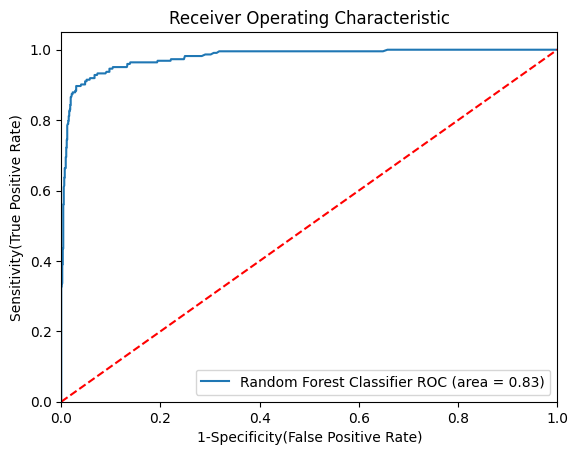

In [169]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 